# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [182]:
# Import appropriate packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read in csv file to a pandas dataframe
df = pd.read_csv('data/human_body_temperature.csv')

In [183]:
# Define a function - ecdf - that will compute the ecdf for
# a 1-d array of measurements

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for ECDF
    x = np.sort(data)

    # y-data for ECDF
    y = np.arange(1, n+1) / n

    return x, y

# 1. Is the distribution of body temperature normal?

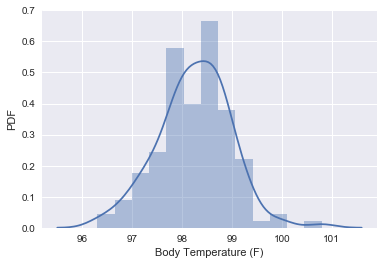

In [184]:
# Test normality graphically
sns.set()
_ = sns.distplot(df.temperature, hist=True)
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('PDF')
plt.show()

The graph shows us that the PDF for the body temperature data appears to be approximately normally distributed. However, histograms are notorious for being subject to binning bias and are not the most accurate way to test normality.

We will now test normality by comparing the CDF of the body temperature data to the theoretical CDF of the normal distribution.

mean: 98.24923076923078 standard deviation: 0.7303577789050377


[]

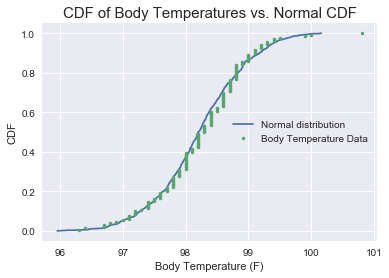

In [185]:
# Test normality by comparing the CDF of data to CDF of
# theoretical CDF of the normal distribution
mean = np.mean(df.temperature)
std = np.std(df.temperature)
samples = np.random.normal(mean, std, size=1000)
print('mean: ' + str(mean), 'standard deviation: ' + str(std))

x, y = ecdf(df.temperature)
x_th, y_th = ecdf(samples)

_ = plt.plot(x_th, y_th)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.title('CDF of Body Temperatures vs. Normal CDF', fontsize=15)
_ = plt.legend(('Normal distribution', 'Body Temperature Data'), loc='center right')
plt.plot()

The graph confirms that the body temperature data is extremely close to being normally distributed.

# 2. Is the sample size large? Are the observations independent?

In [186]:
n = len(df.temperature)
print('Sample size =', n)

Sample size = 130


The sample size is 130, which is greater than 30 (Considered large by the Central Limit Theorem).

Each observation can also be considered independent. The observations represent different people. It is reasonable to believe here that one person's body temperature will not influence another person's body temperature.

# 3. Is the true population mean really 98.6 degrees F?

#### *First, try a bootstrap hypothesis test.*

Here, the null hypothesis is that the true population mean is equal to 98.6.
The alternative hypothesis is that the true population mean is not equal to 98.6.
The significance level is 0.01

In [187]:
# Establish bootstrap functions

def bs_rep_1d(data, function):
    '''Return replicate of a resampled array'''
    
    # Create resampled array and return statistic of interest
    return function(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, function, size=1):
    '''Draw bootstrap replicates'''
    
    # Initialize an array of replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bs_rep_1d(data, function)
        
    return bs_replicates

In [188]:
# Seed random number generator
np.random.seed(25)

# Shift body temperature data to allow the mean to be equal to 98.6
body_temp_shifted = df.temperature - mean + 98.6

# Write function to calculate the test statistic
def diff_of_btmean(data, true_mean=98.6):
    return np.mean(data) - true_mean

# Observed test statistic
diff_obs = diff_of_btmean(df.temperature)
print('Test statistic:', diff_obs)

# Draw bootstrap samples to compute p-values 
bt_bs_reps = draw_bs_reps(body_temp_shifted, diff_of_btmean, 10000)

p_value = np.sum(bt_bs_reps <= diff_obs) / len(bt_bs_reps)
print('p-value:', p_value)

Test statistic: -0.35076923076921673
p-value: 0.0


The p-value is significantly lower than 0.01. This tells us that we should reject the null hypothesis that the true population mean is equal to 98.6 degrees F.

#### *Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?*
#### *In this situation, is it appropriate to use the t or z statistic?*

Since everyone is in the same group in this instance, we will use a one-sample test.
The population standard deviation is not given here, but we do know the sample standard deviation.
We also know that the population is large enough for the Central Limit Theorem to apply, so we can use a z test

In [189]:
# Calculate the z-score
z = (mean - 98.6) / (np.std(df.temperature) / np.sqrt(len(df)))
print('z-statistic:', z)

# Calculate p-value
# Multiply by two to get one-sample test
p_value = stats.norm.cdf(z) * 2
print('p-value:', p_value)

z-statistic: -5.475925202078116
p-value: 4.3523151658821886e-08


Since the p-value is well below the 0.01 significance level, we can reject the null hypothesis. The true mean population is not equal to 98.6.

### *Now try using the other test. How is the result be different? Why?*

In [190]:
t_stat = stats.ttest_1samp(df.temperature, 98.6)[0]
p_value = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t_stat)
print('p_value:', p_value)

t-statistic: -5.4548232923645195
p_value: 2.4106320415561276e-07


The result is the same. The p-value is still well below the 0.01 significance level, so we will reject the null hypothesis that the true population mean is equal to 98.6. The z test is more appropriate to use here because the population standard deviation is not known. 

## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [191]:
# Seed random number generator
np.random.seed(25)

# Acquire sample
bt_sample = np.random.choice(df.temperature, size=10)
bt_sample

array([98.2, 98.4, 98.7, 98.1, 98.7, 99.2, 98.7, 99.2, 98.6, 97.9])

In [192]:
# Z test
z10 = (np.mean(bt_sample) - 98.6) / (np.std(bt_sample) / np.sqrt(len(bt_sample)))
print('z-statistic:', z10)

p_value10 = stats.norm.cdf(z10) * 2
print('p-value:', p_value10)

z-statistic: -0.23138617025612185
p-value: 0.8170148082107741


In [193]:
# T test
t10 = stats.ttest_1samp(bt_sample, 98.6)[0]
p10 = stats.ttest_1samp(bt_sample, 98.6)[1]

print('t-statistic:', t10)
print('p-value:', p10)

t-statistic: -0.21951219512185538
p-value: 0.8311488285472721


The p-value for both of these tests suggest that we should not reject the null hypothesis that the true population mean is equal to 98.6 at either the 0.01 or 0.05 significance levels. Obviously a sample size of 10 out of 130 total observations is not entirely representative of the entire dataset, which could help explain the skewed result.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

#### *As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.*

#### *Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.*

In [194]:
# Calculate the margin of error
sd = np.std(df.temperature)
moe = 1.96 * sd / np.sqrt(n) # 1.96 is the critical value we will use for the 95% confidence interval
print('Margin of Error:', moe)

# Calculate the 95% confidence interval
ci = mean + np.array([-1, 1]) * moe
print('Confidence Interval:', ci)

Margin of Error: 0.125550964802579
Confidence Interval: [98.1236798  98.37478173]


The above confidence interval tells us is that with 95% confidence, we can say that any temperature outside of this range can be considered abnormal.

In [196]:
# We will now try the bootstrap method for calculating the confidence interval
# Seed the random number generator
np.random.seed(25)

# Acquire bootstrap replicates for temperature
reps = draw_bs_reps(df.temperature, np.mean, size=10000)

bs_ci = np.percentile(reps, [0.025, 97.5])

print('Bootstrap Confidence Interval:', bs_ci)

Bootstrap Confidence Interval: [98.03807673 98.37386538]


As we can see, the confience interval using the bootstrap method is very similiar to what we caluclated using the frequentist approach. 

# Is there a significant difference between males and females in normal temperature?

#### *What testing approach did you use and why?*
#### *Write a story with your conclusion in the context of the original problem.*

In [197]:
# Filter the dataframe to isolate male and female body temperatures
male = df.temperature[df.gender == 'M']
female = df.temperature[df.gender == 'F']

# Calculate n for each group
n_male = len(male)
n_female = len(female)

# Calculate mean for each group
mean_male = np.mean(male)
mean_female = np.mean(female)

print('Male sample size:', n_male)
print('Female sample size:', n_female)

print('\nMean male body temperature:', mean_male)
print('Mean female body temperature:', mean_female)

Male sample size: 65
Female sample size: 65

Mean male body temperature: 98.1046153846154
Mean female body temperature: 98.39384615384613


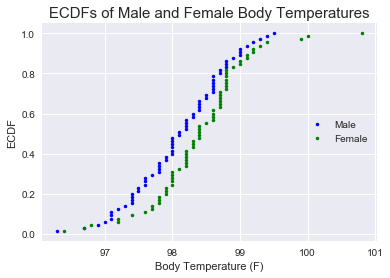

In [198]:
x_male, y_male = ecdf(male)
x_fem, y_fem = ecdf(female)

_ = plt.plot(x_male, y_male, marker='.', linestyle='none', color='blue')
_ = plt.plot(x_fem, y_fem, marker='.', linestyle='none', color='green')
_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDFs of Male and Female Body Temperatures', fontsize=15)
_ = plt.legend(('Male', 'Female'), loc='center right')
plt.show()

By calculating the summary statistics and graphing the ECDFs of the male and female groups, it appears as though there is quite a big difference in the mean body temperatures. We will now use a permutation test in order to determine whether this difference is significant or not.

Our null hypothesis is: There is no significant difference between male and female normal body temperature (The difference between the sample means of the two groups is equal to zero).

Our alternative hypothesis is: There is a significant difference between male and female normal body temperature (The difference between the sample means of the two groups is not equal to zero).

Our significance level will be 0.05

In [199]:
# Write functions to generate permutation samples and replicates
def perm_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = perm_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

# Write function to calculate difference between means
def diff_of_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

In [200]:
# Seed random number generator
np.random.seed(25)

# Compute difference of means
emp_diff_means = diff_of_means(female, male)

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(female, male, diff_of_means, size=10000)

# Calculate p-value
perm_p = np.sum(perm_replicates >= emp_diff_means) / len(perm_replicates)

print('Difference between means:', emp_diff_means)
print('p-vale:', perm_p)

Difference between means: 0.289230769230727
p-vale: 0.0135


Since the p-value is less than our signifcance level of 0.05, we have enough evidence to reject the null hypothesis that the difference between male and female normal body temperature is significant.